In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()


Saving Data_Pathrise.xlsx to Data_Pathrise (1).xlsx


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('Data_Pathrise.xlsx')

In [ ]:
df.head()

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2544 non-null   int64  
 1   pathrise_status              2544 non-null   object 
 2   primary_track                2544 non-null   object 
 3   cohort_tag                   2536 non-null   object 
 4   program_duration_days        1928 non-null   float64
 5   placed                       2544 non-null   int64  
 6   employment_status            2315 non-null   object 
 7   highest_level_of_education   2486 non-null   object 
 8   length_of_job_search         2470 non-null   object 
 9   biggest_challenge_in_search  2520 non-null   object 
 10  professional_experience      2322 non-null   object 
 11  work_authorization_status    2260 non-null   object 
 12  number_of_interviews         2326 non-null   float64
 13  number_of_applicat

In [ ]:
df['placed'].value_counts()

0    1588
1     956
Name: placed, dtype: int64

In [ ]:
df = df[df['placed'] == 1]

In [ ]:
df['pathrise_status'].value_counts()

Placed    956
Name: pathrise_status, dtype: int64

In [ ]:
df['length_of_job_search'].value_counts()

1-2 months             318
Less than one month    299
3-5 months             174
6 months to a year      84
Over a year             44
Name: length_of_job_search, dtype: int64

In [ ]:

df = df[df['length_of_job_search'] != 'Over a year']

In [ ]:
df['length_of_job_search'].value_counts()

1-2 months             318
Less than one month    299
3-5 months             174
6 months to a year      84
Name: length_of_job_search, dtype: int64

In [ ]:
def summary_time(x) :
  if 'Less than one month' in str(x) :
    return '30'
  elif '1-2 months' in str(x) :
    return '60'
  elif '3-5 months' in str(x) :
    return '120'
  elif '6 months to a year' in str(x) :
    return '270'
  else :
    return '360'


In [ ]:
df['length_of_job_search'] = df['length_of_job_search'].apply(summary_time)

In [ ]:
df['professional_experience'].value_counts()

1-2 years             327
Less than one year    240
3-4 years             227
5+ years              107
Name: professional_experience, dtype: int64

In [ ]:
def summary_year(x) :
  if 'Less than one year' in str(x) :
    return 360
  elif '1-2 years' in str(x) :
    return 540
  elif '3-4 years' in str(x) :
    return 1260
  else :
    return 1800

In [ ]:
df['professional_experience'] = df['professional_experience'].apply(summary_year)

In [ ]:
df['professional_experience'].value_counts()

540     327
360     240
1260    227
1800    162
Name: professional_experience, dtype: int64

In [ ]:
df['program_duration_days'].fillna('missing value' , inplace = True)

In [ ]:
df = df[df['program_duration_days'] != 'missing value']

In [ ]:
df['program_duration_days'].info()

<class 'pandas.core.series.Series'>
Int64Index: 956 entries, 4 to 2534
Series name: program_duration_days
Non-Null Count  Dtype  
--------------  -----  
956 non-null    float64
dtypes: float64(1)
memory usage: 14.9 KB


In [ ]:
df['program_duration_days'].value_counts()

73.0     10
59.0     10
115.0     9
145.0     8
94.0      8
         ..
235.0     1
152.0     1
395.0     1
419.0     1
306.0     1
Name: program_duration_days, Length: 332, dtype: int64

In [ ]:
def program_duration(x):
  if 0<x<31 :
    return 30
  elif 30<x<101 :
    return 65
  elif 100<x<301 :
    return 200
  elif 300<x<500 :
    return 400
  else :
    return 500

In [ ]:
df['program_duration_days'] = df['program_duration_days'].apply(program_duration)

In [ ]:
df['program_duration_days'].value_counts()

200    523
65     268
400    106
30      55
500      4
Name: program_duration_days, dtype: int64

In [ ]:
df = df[df['work_authorization_status'] != 'Not Authorized']

In [ ]:
df['work_authorization_status'].fillna('missing value' , inplace = True)

In [ ]:
df['work_authorization_status'].value_counts()

Citizen           395
F1 Visa/OPT       222
missing value     125
Green Card         68
Other              41
F1 Visa/CPT        40
H1B                11
Canada Citizen      8
STEM OPT            2
Name: work_authorization_status, dtype: int64

In [ ]:
def work_permit(x):
  if ('Citizen' in str(x)) or ('Green Card' in str(x)) or('Canada Citizen' in str(x)) :
    return 'permanent'
  elif 'F1 Visa/OPT' or 'F1 Visa/CPT' in str(x) :
    return 'F1'
  else :
    return 'other'

In [ ]:
df['work_authorization_status']=df['work_authorization_status'].apply(work_permit)

In [ ]:
from pandas.core.algorithms import value_counts
df['work_authorization_status'].value_counts()

permanent    494
F1           462
Name: work_authorization_status, dtype: int64

In [ ]:
df['primary_track'].value_counts()

SWE          636
Design        85
Data          79
PSO           73
Web            1
Marketing      1
Name: primary_track, dtype: int64

In [ ]:
df['highest_level_of_education'].value_counts()

Bachelor's Degree                   524
Master's Degree                     288
Doctorate or Professional Degree     59
Some College, No Degree              50
High School Graduate                 10
GED or equivalent                     5
Some High School                      4
Name: highest_level_of_education, dtype: int64

In [ ]:
df['highest_level_of_education'].fillna('missing value' , inplace = True)

In [ ]:
df['highest_level_of_education'].value_counts()

Bachelor's Degree                   524
Master's Degree                     288
Doctorate or Professional Degree     59
Some College, No Degree              50
missing value                        16
High School Graduate                 10
GED or equivalent                     5
Some High School                      4
Name: highest_level_of_education, dtype: int64

In [ ]:
def degree_organizer(x):
  if 'Bachelor' in str(x) :
    return 'BC'
  elif 'Master' in str(x) :
    return 'MS'
  elif ('Doctorate' in str(x)) or ('Professional' in str(x)) :
    return 'PHD'
  elif ('College' in str(x)) or ('No Degree' in str(x)) :
    return 'College Degree'
  else :
    return 'other'

In [ ]:
df['highest_level_of_education'].apply(degree_organizer)

4        BC
23       MS
30       MS
39       MS
54       MS
       ... 
2527     BC
2528    PHD
2531    PHD
2533     BC
2534     BC
Name: highest_level_of_education, Length: 956, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 956 entries, 4 to 2534
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           956 non-null    int64  
 1   pathrise_status              956 non-null    object 
 2   primary_track                956 non-null    object 
 3   cohort_tag                   954 non-null    object 
 4   program_duration_days        956 non-null    int64  
 5   placed                       956 non-null    int64  
 6   employment_status            956 non-null    object 
 7   highest_level_of_education   956 non-null    object 
 8   length_of_job_search         919 non-null    object 
 9   biggest_challenge_in_search  941 non-null    object 
 10  professional_experience      956 non-null    int64  
 11  work_authorization_status    956 non-null    object 
 12  number_of_interviews         877 non-null    float64
 13  number_of_applicati

In [ ]:
df['employment_status ']

4               Unemployed
23              Unemployed
30                 Student
39      Employed Full-Time
54                 Student
               ...        
2527               Student
2528               Student
2531            Unemployed
2533         missing value
2534    Employed Full-Time
Name: employment_status , Length: 956, dtype: object

In [ ]:
df['employment_status '].fillna('missing value', inplace = True)

In [ ]:
def employee(x):
  if 'Student' in str(x) :
    return 'Student'
  elif 'Unemployed' in str(x) :
    return 'Unemployed'
  elif ('Employed Full-Time' in str(x)) or ('Employed Part-Time' in str(x)) or ('Contractor' in str(x)):
    return 'Employed'
  else :
    return 'other'

In [ ]:
df['employment_status '] = df['employment_status '].apply(employee)

In [ ]:
df['employment_status '].value_counts()

Employed      318
Student       286
Unemployed    253
other          99
Name: employment_status , dtype: int64

In [ ]:
cleaned_df = df[['primary_track','program_duration_days','employment_status ',
'highest_level_of_education', 'professional_experience']]

In [ ]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 956 entries, 4 to 2534
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   primary_track               956 non-null    object
 1   program_duration_days       956 non-null    int64 
 2   employment_status           956 non-null    object
 3   highest_level_of_education  956 non-null    object
 4   professional_experience     956 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 44.8+ KB


In [ ]:
preprocessed_df = pd.get_dummies(cleaned_df,columns = ['primary_track','employment_status ' , 'highest_level_of_education'])

In [ ]:
preprocessed_df.head()

,program_duration_days,professional_experience,primary_track_Data,primary_track_Design,primary_track_Marketing,primary_track_PSO,primary_track_SWE,primary_track_Web,employment_status _Employed,employment_status _Student,employment_status _Unemployed,employment_status _other,highest_level_of_education_Bachelor's Degree,highest_level_of_education_Doctorate or Professional Degree,highest_level_of_education_GED or equivalent,highest_level_of_education_High School Graduate,highest_level_of_education_Master's Degree,"highest_level_of_education_Some College, No Degree",highest_level_of_education_Some High School,highest_level_of_education_missing value
4,65,540,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0
23,200,540,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
30,65,540,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0
39,65,1800,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
54,65,1260,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0


In [ ]:
preprocessed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 956 entries, 4 to 2534
Data columns (total 20 columns):
 #   Column                                                       Non-Null Count  Dtype
---  ------                                                       --------------  -----
 0   program_duration_days                                        956 non-null    int64
 1   professional_experience                                      956 non-null    int64
 2   primary_track_Data                                           956 non-null    uint8
 3   primary_track_Design                                         956 non-null    uint8
 4   primary_track_Marketing                                      956 non-null    uint8
 5   primary_track_PSO                                            956 non-null    uint8
 6   primary_track_SWE                                            956 non-null    uint8
 7   primary_track_Web                                            956 non-null    uint8
 8   employmen

In [ ]:
x = preprocessed_df.drop(columns='program_duration_days')


In [ ]:
y = preprocessed_df['program_duration_days']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=.3 , random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
prediction = lr.predict(x_test)

In [ ]:
prediction

array([159.24844927, 181.19186335, 177.44277072, 153.67548199,
       180.33938312, 180.33938312, 176.19769034, 181.5844635 ,
       180.56258499, 127.60422662, 180.68288021, 179.43779983,
       210.87643137, 177.44277072, 214.625524  , 176.19769034,
       153.67548199, 187.68170054, 179.94678297, 179.10815422,
       179.94678297, 176.54118743, 180.68288021, 181.5844635 ,
       179.10815422, 160.49352965, 188.02519763, 185.19940942,
       153.67548199, 175.29610705, 176.54118743, 179.10815422,
       177.47884473, 171.21736882, 179.94678297, 179.94678297,
       160.49352965, 184.08847575, 176.19769034, 170.72223717,
       153.36654446, 170.72223717, 208.25810575, 214.625524  ,
       184.80680926, 213.25500893, 174.45747831, 181.5844635 ,
       149.53378921, 149.53378921, 178.30362199, 182.30877886,
       153.67548199, 174.96646144, 158.53550829, 187.28311854,
       171.2312203 , 159.24844927, 185.33355613, 179.43779983,
       189.78713079, 186.45047165, 180.15613335, 171.62

In [ ]:
y_test

716     200
2244    200
2032    400
289     200
1172    200
       ... 
2305     65
198     200
86      200
2474     65
1606    200
Name: program_duration_days, Length: 287, dtype: int64

In [ ]:
residual = prediction - y_test

In [ ]:
import seaborn as sns

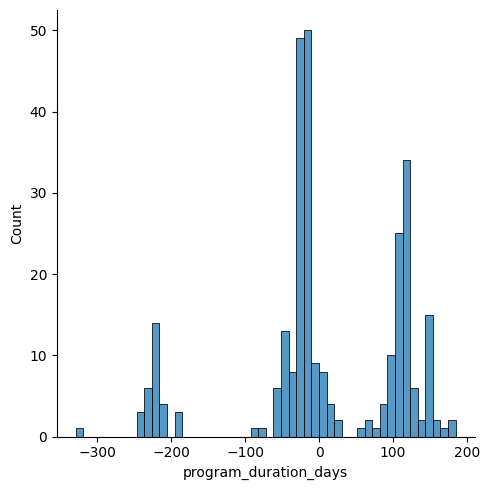

In [ ]:
sns.displot(residual , bins = 50 )

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE' , metrics.mean_absolute_error(y_test , prediction))

MAE 80.17769897814811


In [ ]:
import pickle

In [ ]:
pickle.dump(lr,open('pathrise_model.pkl' , 'wb'))